<a href="https://colab.research.google.com/github/jcromeroru/Segunda-Entrega-Instrumentos-Opticos/blob/main/Entrega_2_punto_c_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos las librerías, definimos las unidades y tamaño de píxel

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

#definimos nuestras unidades
um = 1e-6
mm = 1e-3
nm= 1e-9

N = 2048
M = 2048
w_length = 650*nm #definimos la longitud de onda
dx=dy=1*um #definimos el tamaño de pixel con condiciones de mundo 

# ***Definimos las máscaras a usar***

In [ ]:
#definimos la máscara a usar

In [ ]:
'''Debemos definir dimensiones de mundo para poder escalar de manera física las aberturas y obstáculos'''
M_mask = 760
N_mask = 760
#definimos el espacio coordenado
x=np.arange(-int(M_mask/2),int(M_mask/2),1)
y=np.arange(-int(N_mask/2),int(N_mask/2),1)
X,Y =np.meshgrid(x,y)
#damos dimensiones de mundo
X = X*dx
Y = Y*dy

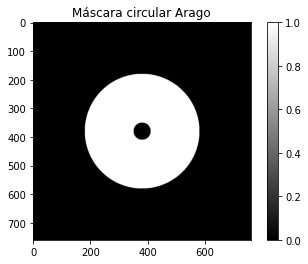

In [ ]:
r_1 = 30*um
r_a = 200*um
#Presentamos las máscaras como areglos que permitan dimensiones reales iguales que las máscaras anteriores (en forma)

mask_circ_1 = np.array(X**2+Y**2 >= r_1**2, dtype=bool)#obstáculo central
mask_circ_2 = np.array(X**2+Y**2 <= r_a**2, dtype=bool)#rendija circular pasante
mask_dona = mask_circ_1*mask_circ_2

plt.figure()
plt.title("Máscara circular Arago")
plt.imshow(mask_dona,cmap='gray')
plt.colorbar()
plt.show()

# **Punto 1**
Difracción escalar de transformada de fresnel y espectro ángular (FFT y DFT)

# **FFT**

Espectro angular

In [ ]:
#Definimos la función de transmitancia para espectro angular
def T_AproxEA(T_f,dx_f,dy_f,z_f,wave_length):
  '''
  sea T_f: la transmirancia que le voya  ingresar, equivalente al U_0
  '''
  #tomamos el contenido freq de la imagen
  T_freq=np.fft.fftshift(np.fft.fft2(T_f))

  #definimos el espacio coordenado
  N_f, M_f = np.shape(T_f)
  
  x=np.arange(-int(M_f/2),int(M_f/2),1)
  y=np.arange(-int(N_f/2),int(N_f/2),1)
  X,Y= np.meshgrid(x,y)

  #damos dimensiones de mundo
 
  fx=X*(1/(M_f*dx_f))*wave_length
  fy=Y*(1/(N_f*dy_f))*wave_length

  k=2*np.pi/wave_length

  C1 = (1j*k*z_f)#/(1j*wave_Length*z_f)
  C2 = -1j*np.pi*wave_length*z_f

  
  mat = np.exp(C1*(1-(fx**2)-(fy**2))**1/2)
  freq_p = T_freq*mat
  return freq_p

**Punto 2 C**


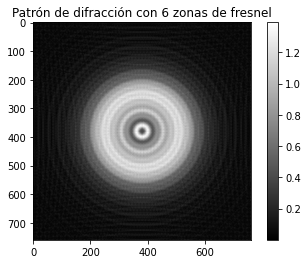

In [ ]:
#Para 6 zonas de fresnel, la distancia z es z3
z3 = 10.26*mm
f_prop_ob = T_AproxEA(mask_dona,dx,dy,z3,w_length)

difr_prop_ob = np.fft.ifft2(f_prop_ob)

plt.figure()
plt.title("Patrón de difracción con 6 zonas de fresnel")
plt.imshow(np.abs(difr_prop_ob),cmap='gray')
plt.colorbar()
plt.show()

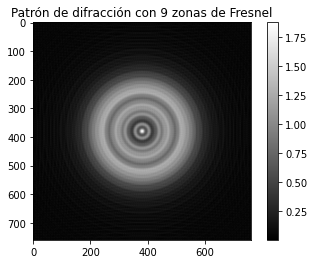

In [ ]:
#Para 9 zonas de fresnel
z3 = 6.83*mm
f_prop_ob = T_AproxEA(mask_dona,dx,dy,z3,w_length)

difr_prop_ob = np.fft.ifft2(f_prop_ob)

plt.figure()
plt.title("Patrón de difracción con 9 zonas de Fresnel")
plt.imshow(np.abs(difr_prop_ob),cmap='gray')
plt.colorbar()
plt.show()